# Customers Churn Rate

**Description**: This project is aim to understand the churn rate of customers in a company using a machine learning classification model in order to increase the company's profit or revenue margin and customer retention

# Hypothesis
<b>Null Hypothesis: Customers with high monthly charges do not have the tendency to churn<b>

<b>Alternate Hypothesis:Customers with high monthly Charges have the tendency to churn<b>


nalytical Questions
1. Which payment method is the most popular?
2. Which internet service was purchased the most?
3. Which gender recorded the highest churn
4. Which one of the contract types did the highest churn
5. Which age group did the highest churn
6. Does high monthly charges affect the churn rate

# Importation of Libraries

In [2]:
# Data manipulation packages
import pandas as pd
import numpy as np
 
#Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
 
# Machine learning Packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import set_config
# from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB

from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest,mutual_info_classif

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
 
 
# Database connection package
import pyodbc
from dotenv import dotenv_values
 
# Ignore warnings (optional)
import warnings
warnings.filterwarnings("ignore")

<b>Loading of Environment<b>

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")



In [6]:
#load environment viarables from .env
environment_variables= dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=y"
connection = pyodbc.connect(connection_string)

In [7]:
connection = pyodbc.connect(connection_string)

OperationalError: ('08001', '[08001] [Microsoft][ODBC SQL Server Driver][DBNETLIB]SQL Server does not exist or access denied. (17) (SQLDriverConnect); [08001] [Microsoft][ODBC SQL Server Driver][DBNETLIB]ConnectionOpen (Connect()). (53); [08001] [Microsoft][ODBC SQL Server Driver]Invalid connection string attribute (0)')

In [4]:
# code to connect to the server, user name, password, database and table

conn_str =f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [5]:
# connection to the server using the pyodbc
connection = pyodbc.connect(conn_str)

# Loading of the data sets for the analysis

In [6]:
query = "SELECT * FROM LP2_Telco_churn_first_3000"

data1 = pd.read_sql(query, connection)

In [7]:
data1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [22]:
# Second dataset
data_2 = pd.read_csv('LP2_Telco-churn-last-2000.csv')
data_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [23]:
# third dataset
data_3 = pd.read_excel('Telco-churn-second-2000.xlsx')
data_3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


# Exploratory Data Analysis (EDA)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [ ]:
# checking for the duplicates on the train data
data1.duplicated().sum()

0

In [ ]:
# checking if there are missing values in data1
data1.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

From above there are missing vlalues in some of the columns like MultipleLines,OnlineSecurity,OnlineBackup 651 values, DeviceProtection 651 values, 
TechSupport 651 values, StreamingTV 651 values, StreamingMovies 651 values.

In [ ]:
#  checking the info in data 2
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


From data 2 there is no missing values

In [ ]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


## Observations
Most column on data1 are booleans while in data2 and 3 the columns are 'yes' or 'No' which are strings so we need to staderside the columns to be same

# Data Cleaning

### List of things to do

- `Convert Some Columns Representations to Boolean`
- `Missing Value`

In [19]:
# # Convert a column to a numeric type
# data_2['TotalCharges'] = pd.to_numeric(data_3['TotalCharges'], errors='coerce', downcast= 'float')

In [20]:
# # List of columns to be converted to boolean 
# boolean_columns_first_data = ['Partner', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'MultipleLines',
#                                'Dependents', 'PhoneService', 'TechSupport', 'StreamingMovies', 'StreamingTV', 'PaperlessBilling']

# # Function to convert "Yes", "No", to True and False
# def map_yes_no_to_boolean(value):
#     return value.lower() == 'yes'

# # Iterate through the list and convert corresponding columns in data_3 to boolean type
# for column in boolean_columns_first_data:
#     data_2[column] = data_3[column].map(map_yes_no_to_boolean)


We have a column with integer values 0 and 1, Yes and No want to convert them to boolean values (`False` and `True`), you can use the `astype` 

In [17]:
data_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [21]:
# We converted the yes&no to True and Yes 

# def map_yes_no_to_bool(value):
#     return value.lower()=='yes'

# data_2['Churn'] = data_3['Churn'].map(map_yes_no_to_bool)

In [ ]:
#Senior column' is the column I  want to convert

# data_3['SeniorCitizen'] = data_3['SeniorCitizen'].astype(bool)

In [24]:
# convert boolean values in the senior citizen column to strings
data1['SeniorCitizen']= data1['SeniorCitizen'].replace({False:'No', True:'Yes'})

# convert boolean values in the partner column to strings
data1['Partner']= data1['Partner'].replace({False:'No', True:'Yes'})

# convert boolean values in the dependants column to strings
data1['Dependents']= data1['Dependents'].replace({False:'No', True:'Yes'})

# convert boolean values in the phone service column to strings
data1['PhoneService']= data1['PhoneService'].replace({False:'No', True:'Yes'})

# convert boolean values in the MultipleLines column to strings
data1['MultipleLines']= data1['MultipleLines'].replace({False:'No', True:'Yes', None:'No phone service'})

# convert boolean values in the OnlineSecurity column to strings
data1['OnlineSecurity']= data1['OnlineSecurity'].replace({False:'No', True:'Yes', None:'No internet service'})


# convert boolean values in the OnlineBackup column to strings
data1['OnlineBackup']= data1['OnlineBackup'].replace({False:'No', True:'Yes', None:'No internet service'})

# convert boolean values in the DeviceProtection column to strings
data1['DeviceProtection']= data1['DeviceProtection'].replace({False:'No', True:'Yes', None:'No internet service'})

# convert boolean values in the TechSupport column to strings
data1['TechSupport']= data1['TechSupport'].replace({False:'No', True:'Yes', None:'No internet service'})

# convert boolean values in the StreamingTV column to strings
data1['StreamingTV']= data1['StreamingTV'].replace({False:'No', True:'Yes', None:'No internet service'})

# convert boolean values in the StreamingMovies column to strings
data1['StreamingMovies']= data1['StreamingMovies'].replace({False:'No', True:'Yes', None:'No internet service'})

# convert boolean values in the PaperlessBilling column to strings
data1['PaperlessBilling']= data1['PaperlessBilling'].replace({False:'No', True:'Yes', None:'No internet service'})

# convert boolean values in the Churn column to strings
data1['Churn']= data1['Churn'].replace({False:'No', True:'Yes'})

In [25]:
data1['Churn'].unique()

array(['No', 'Yes', None], dtype=object)

In [26]:
data1.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
Churn               1
dtype: int64

In [27]:
# describe  the data1
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


In [28]:
data1.describe(include=object).T

,count,unique,top,freq
customerID,3000,3000,7590-VHVEG,1
gender,3000,2,Male,1537
SeniorCitizen,3000,2,No,2525
Partner,3000,2,No,1538
Dependents,3000,2,No,2070
PhoneService,3000,2,Yes,2731
MultipleLines,3000,3,No,1437
InternetService,3000,3,Fiber optic,1343
OnlineSecurity,3000,3,No,1478
OnlineBackup,3000,3,No,1320


Checking the uniqness of the data

In [ ]:
data1['Churn'].unique()

array(['No', 'Yes', None], dtype=object)

In [ ]:
data1['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
data1['MonthlyCharges'].unique()

array([29.85000038, 56.95000076, 53.84999847, ..., 33.90000153,
       34.        , 38.59999847])

In [ ]:
data1['TotalCharges'].unique()

array([  29.85000038, 1889.5       ,  108.15000153, ..., 6143.14990234,
        144.80000305,  414.95001221])

Standazing the senior citizen columns in data 2 and data 3 replacing the 0 and 1 with No and Yes

In [29]:

# Replace int values in the senior citizen column of data2 to string values
data_2['SeniorCitizen']= data_2['SeniorCitizen'].replace({0:'No', 1:'Yes'})

# Replace int values in the senior citizen column of data3 to string values
data_3['SeniorCitizen']= data_3['SeniorCitizen'].replace({0:'No', 1:'Yes'})

In [30]:
data_2['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

### Merging of the two data together for visualization and understanding of data for preparation

In [31]:
#Merging the SQL and CSV dataset

data= pd.concat([data1,data_2])
data.to_csv('data_churn.csv')

In [32]:
data_df= pd.read_csv('data_churn.csv')
data_df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000381469727,No
1,1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.1500015258789,Yes
3,3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.64999389648438,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,2038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,2040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,2041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [ ]:
# checking the shape of the data
data_df.shape

(5043, 22)

In [ ]:
# check the data info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5043 non-null   int64  
 1   customerID        5043 non-null   object 
 2   gender            5043 non-null   object 
 3   SeniorCitizen     5043 non-null   object 
 4   Partner           5043 non-null   object 
 5   Dependents        5043 non-null   object 
 6   tenure            5043 non-null   int64  
 7   PhoneService      5043 non-null   object 
 8   MultipleLines     5043 non-null   object 
 9   InternetService   5043 non-null   object 
 10  OnlineSecurity    5043 non-null   object 
 11  OnlineBackup      5043 non-null   object 
 12  DeviceProtection  5043 non-null   object 
 13  TechSupport       5043 non-null   object 
 14  StreamingTV       5043 non-null   object 
 15  StreamingMovies   5043 non-null   object 
 16  Contract          5043 non-null   object 


In [33]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5043.0,1305.651993,801.484415,0.0,630.000,1260.000000,1890.500000,2999.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


In [34]:
#  drop some of the columns that may not be useful for the machine learning
data_df.drop('customerID',axis=1, inplace=True)
data_df.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
data_df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000381469727,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No


In [ ]:
data_df.shape

(5043, 20)

In [ ]:
data_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data_df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# cheking for the missing values
data_df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
Churn               0
dtype: int64

In [35]:
# Drop rows with NaN values in the 'Churn' column
data_df.dropna(subset=['Churn'], inplace=True)

# Univariate Analysis

#### visualization of Numeric columns

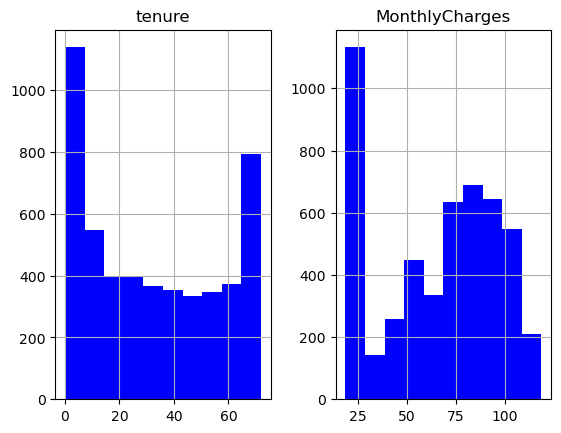

In [36]:

data_df.hist(color='blue')
plt.show()

<Axes: >

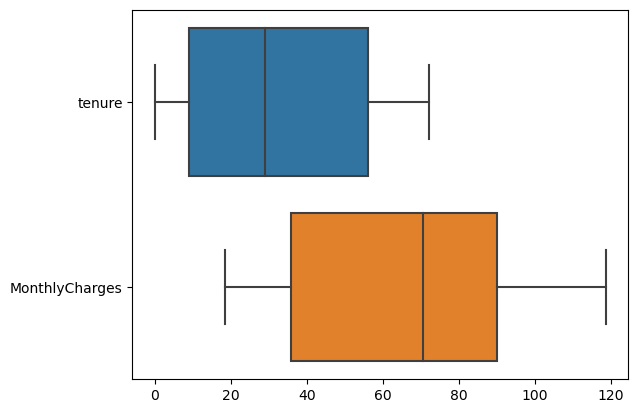

In [38]:
# Boxplot Visualization

sns.boxplot(data=data_df, orient='h')

In [ ]:
data_df.tail(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5033,Male,No,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
5034,Female,No,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
5035,Male,No,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
5036,Female,No,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
5037,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
5038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
5039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
5040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
5041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
5042,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


#### visualization of categorical columns

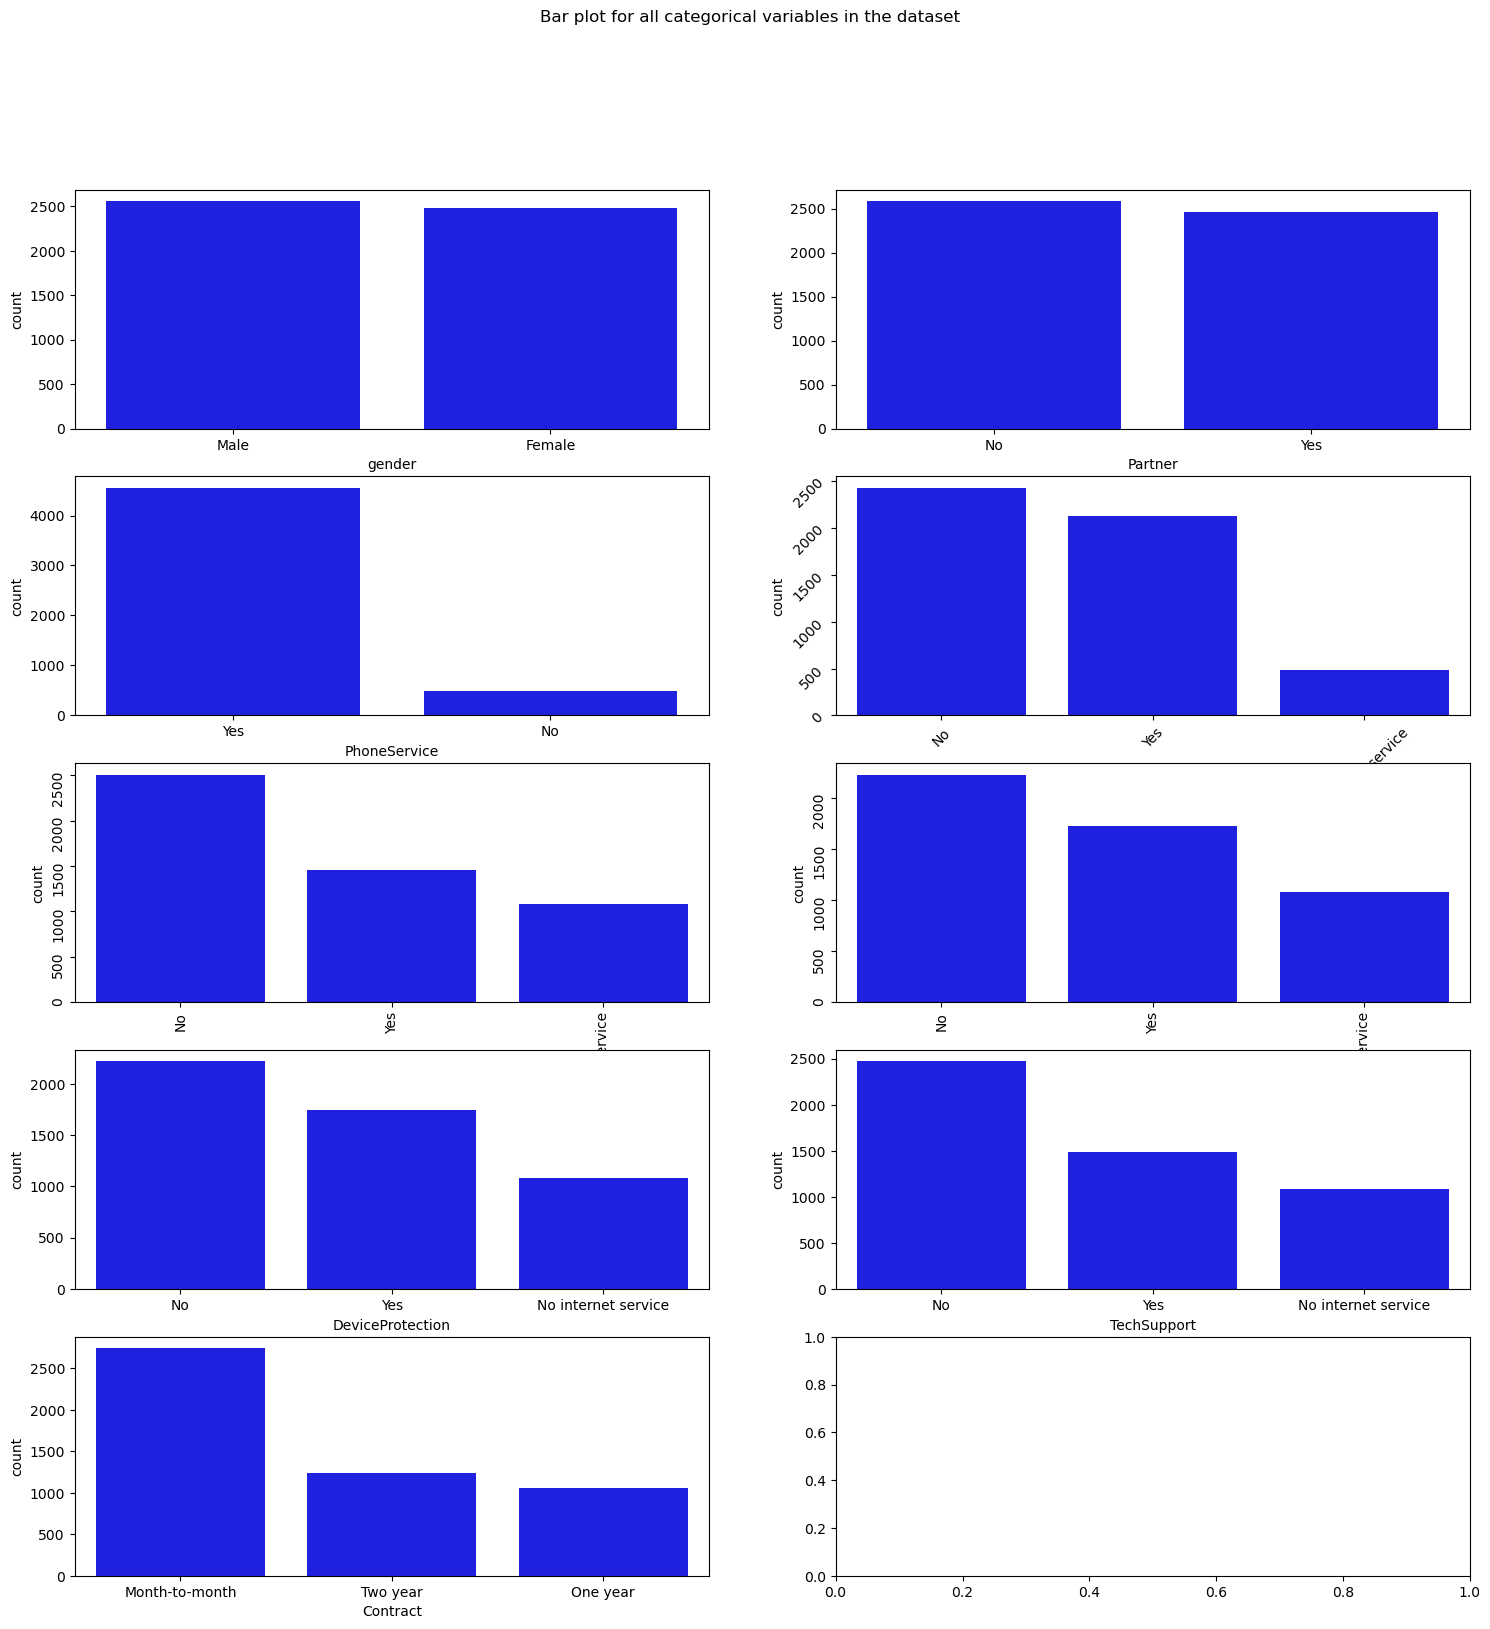

In [37]:
fig, axes = plt.subplots(5, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'gender', data = data_df, color = 'blue', 
              order = data_df['gender'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Partner', data = data_df, color = 'blue', 
              order = data_df['Partner'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'PhoneService', data = data_df, color = 'blue', 
              order = data_df['PhoneService'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'MultipleLines', data = data_df, color = 'blue', 
              order = data_df['MultipleLines'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'OnlineSecurity', data = data_df, color = 'blue', 
              order = data_df['OnlineSecurity'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'OnlineBackup', data = data_df, color = 'blue', 
              order = data_df['OnlineBackup'].head(20).value_counts().index);
sns.countplot(ax=axes[3,0], x='DeviceProtection', data= data_df, color='blue',
              order=data_df['DeviceProtection'].value_counts().index);
sns.countplot(ax= axes[3,1], x='TechSupport', data=data_df, color='blue', order=data_df['TechSupport'].value_counts().index);
sns.countplot(ax= axes[4,0], x='Contract', data=data_df, color='blue', order=data_df['Contract'].value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

<Axes: ylabel='Density'>

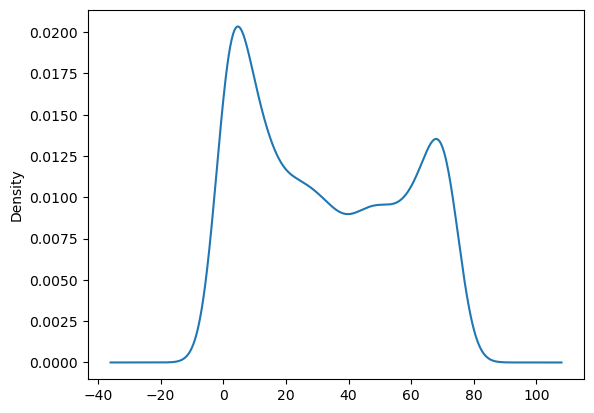

In [ ]:
churn_data['tenure'].plot(kind='kde')

From the visualization above our data is not normally distributed because none of them has bell shape curve

# Bivariant Analysis

In [ ]:
corr= data_df.corr()

<Axes: >

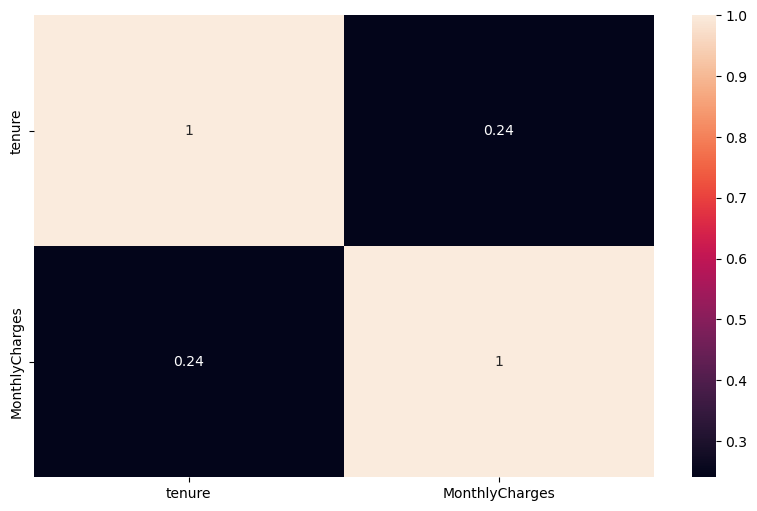

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data=corr,annot=True)

#### From the hitmap above the datas are not numerically corelated

# Multivariate Analysis

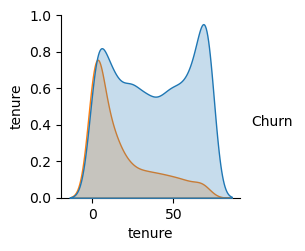

In [ ]:
data=data_df[['Contract','SeniorCitizen', 'Dependents','tenure','Churn']]
sns.pairplot(data, hue='Churn')
plt.show()


<Axes: >

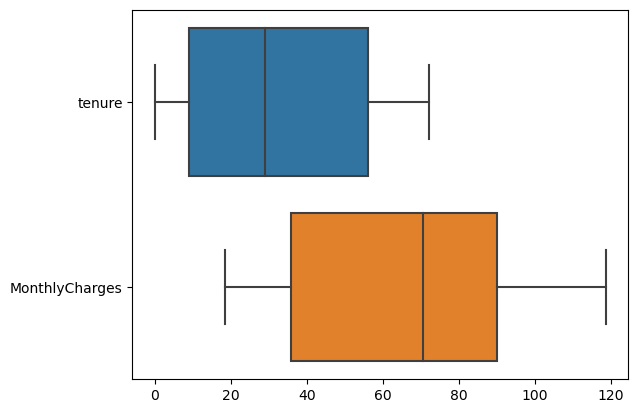

In [ ]:
sns.boxplot(data_df, orient='h')

Analytical Questions
1. Which payment method is the most popular?
2. Which internet service was purchased the most?
3. Which gender recorded the highest churn
4. Which one of the contract types did the highest churn
5. Which age group did the highest churn
6. Does high monthly charges affect the churn rate

## 1a. which payment method is the most popular

<Axes: xlabel='PaymentMethod', ylabel='count'>

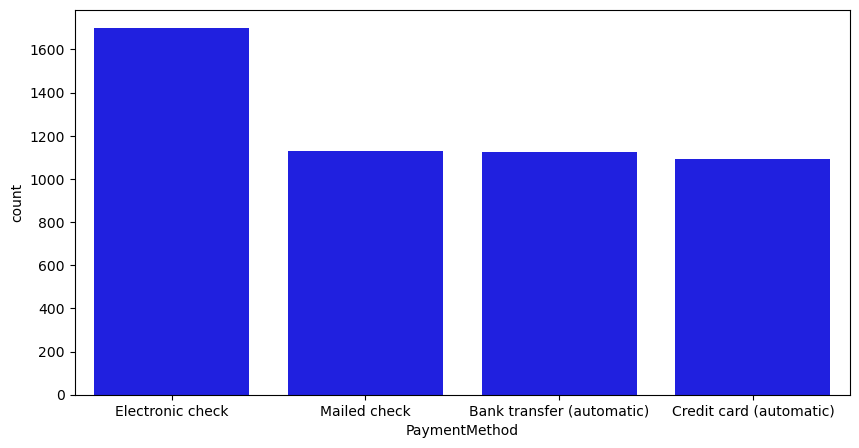

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data_df, x='PaymentMethod', color='blue')

## 1b. Which payment method is the most popular?

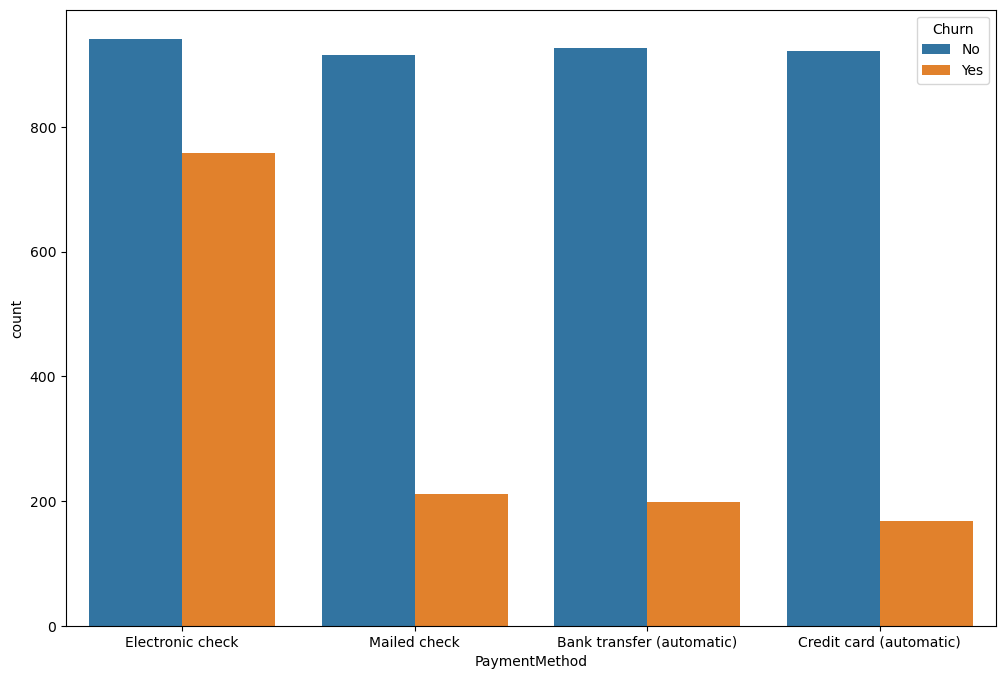

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=data_df, x='PaymentMethod', hue='Churn')
plt.show()

## 2a. Which internet service was purchased the most?

<Axes: xlabel='InternetService', ylabel='count'>

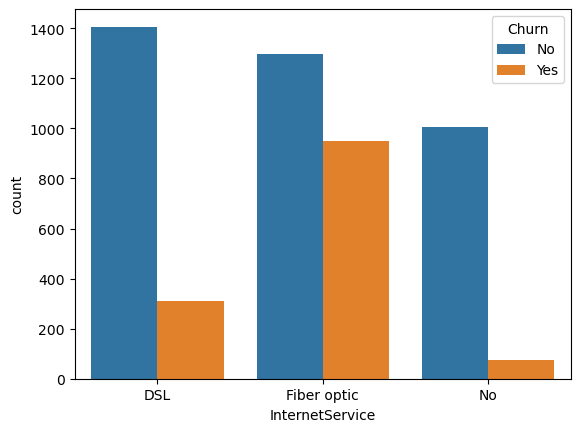

In [ ]:
sns.countplot(data=data_df, x='InternetService', hue= 'Churn')

## 3. Which gender recorded the highest churn

<Axes: xlabel='gender', ylabel='count'>

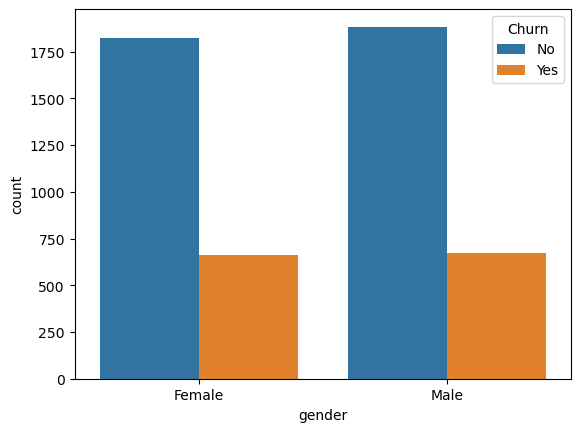

In [ ]:
sns.countplot(data=data_df, x='gender', hue='Churn')

## 4. Which one of the contract types did the highest churn

<Axes: xlabel='Contract', ylabel='count'>

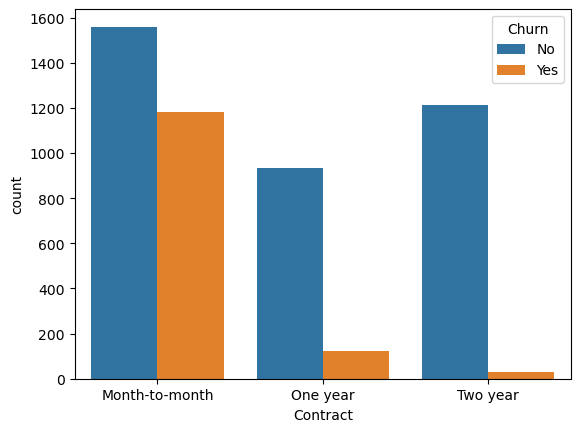

In [ ]:
sns.countplot(data=data_df, x='Contract', hue="Churn")



## 5. Which age group did the highest churn

<Axes: xlabel='SeniorCitizen', ylabel='count'>

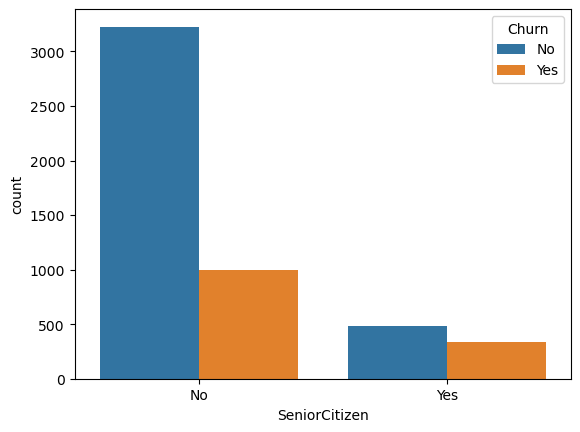

In [ ]:
sns.countplot(data=data_df, x='SeniorCitizen', hue='Churn')

## 6. Does high monthly charges affect the churn rate

In [ ]:
# Group the data by InternetService and calculate the churn rate for each group
internet_churn_group = data_df.groupby('InternetService')['Churn'].value_counts(normalize=True)

# Extract churn rates for Fiber optic and DSL users
fiber_optic_churn_rate = internet_churn_group.loc['Fiber optic', 'Yes']
dsl_churn_rate = internet_churn_group.loc['DSL', 'Yes']
internet_churn_group 

InternetService  Churn
DSL              No       0.819825
                 Yes      0.180175
Fiber optic      No       0.576769
                 Yes      0.423231
No               No       0.929630
                 Yes      0.070370
Name: Churn, dtype: float64

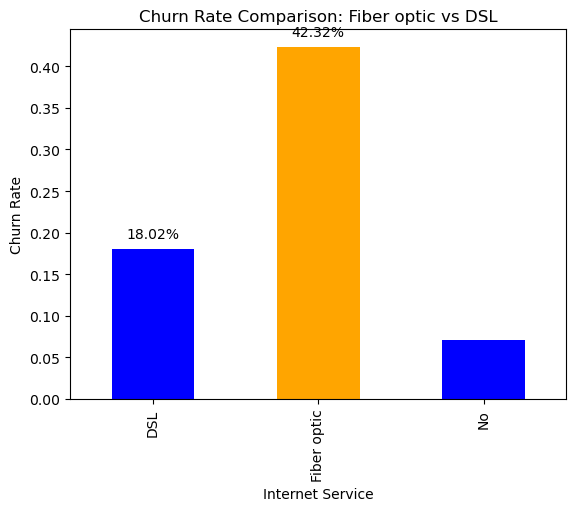

In [ ]:
# Create a bar chart to visualize the churn rates
fig, ax = plt.subplots()
internet_churn_group.loc[:, 'Yes'].plot(kind='bar', ax=ax, color=['blue', 'orange'])
ax.set_ylabel('Churn Rate')
ax.set_xlabel('Internet Service')
ax.set_title('Churn Rate Comparison: Fiber optic vs DSL')

# Annotate the bars with the churn rates
for i, value in enumerate([dsl_churn_rate,fiber_optic_churn_rate]):
    ax.text(i, value + 0.01, f'{value:.2%}', ha='center', va='bottom')

plt.show()

##  `Phase 3 - Data Preparation`

Data Preparation also known as **data preprocessing**, is a crucial phase in the machine learning pipeline. It involves cleaning, transforming, and structuring raw data into a format that is suitable for analysis and model building. Data preparation aims to improve the quality of the data and enhance the performance of machine learning models. This phase lays the foundation for accurate and meaningful analysis and predictions.

- **Train-test split**: Divide the data into training and testing sets for model evaluation.
- **Clean and preprocess data: Handle missing values, outliers, and inconsistencies**.
- **Data Transformation**:
    - Standardization: Scale numerical features to have a mean of 0 and a standard deviation of 1.
    - Normalization: Scale features to a specific range, typically 0 to 1.
    - Log Transformation: Apply log functions to reduce skewness in data distributions.
    - Encoding Categorical Variables: Convert categorical variables into numerical format (e.g., one-hot encoding, label encoding).
- **Feature engineering**
    - Create New Features: Generate new variables based on domain knowledge, interactions, or transformations and choose features that have the most predictive power and discard irrelevant ones.
- **Address class imbalance (if applicable)**: Over-sample, under-sample, or use class weights to balance classes.

In [39]:

# Define features (X) and target variable (y)
X = data_df.drop('Churn', axis=1)  #'Churn' is the target variable
y = data_df['Churn']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (4033, 19)
Shape of X_test: (1009, 19)
Shape of y_train: (4033,)
Shape of y_test: (1009,)


### List of things done below

- `Impute missing values with mean`
- `Standardize numeric features`
- `Power transform for skewness`
- `Impute missing values with most frequent`
- `One-hot encode categorical features`


In [41]:
# getting the numeric columns
numeric_features = X.select_dtypes(include='number').columns
numeric_features

Index(['tenure', 'MonthlyCharges'], dtype='object')

In [42]:
# getting categorical columns
categorical_features= X.select_dtypes(include='object').columns
categorical_features

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

# Pipeline

In [43]:

# Numeric pipeline 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),            
    ('scaler', StandardScaler()),                            
    ('power_transformer', PowerTransformer(method="yeo-johnson")) 
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   
    ('onehot', OneHotEncoder(handle_unknown='ignore'))       
])

# Combine numeric and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)






`ENCODING MY TARGET VARIABLE`

In [44]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

#using the same label_encoder instance we transfromed the test labels )
y_test_encoded = label_encoder.transform(y_test)

'MODELLING'

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = [
    ('tree_classifier',DecisionTreeClassifier(random_state=42)),
    ('svc_classifier',SVC(random_state=42)),
    ('rf_classifier',RandomForestClassifier(random_state=42)),
    ('gb_classifier',GradientBoostingClassifier()),
    ('knn_classifier',KNeighborsClassifier())
 
]
 
for model_name,classifier in models:
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',classifier),
    ])
 
    pipeline.fit(X_train,y_train_encoded)
    
    y_pred = pipeline.predict(X_test)
 
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded,y_pred))
    print ('=' * 50)

Report for tree_classifier
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       742
           1       0.54      0.51      0.52       267

    accuracy                           0.75      1009
   macro avg       0.68      0.67      0.68      1009
weighted avg       0.75      0.75      0.75      1009

Report for svc_classifier
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       742
           1       0.66      0.54      0.59       267

    accuracy                           0.80      1009
   macro avg       0.75      0.72      0.73      1009
weighted avg       0.79      0.80      0.80      1009

Report for rf_classifier
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       742
           1       0.62      0.49      0.55       267

    accuracy                           0.79      1009
   macro avg       0.73      0.69      0.70      1

`FEATURE SELECTION AND IMPORTANCE`

In [57]:
# using over sampling method on the dataset to balance your dataset

from imblearn.over_sampling import RandomOverSampler, SMOTE 
sampler = RandomOverSampler(random_state=42)
X_train_resampled,y_train_resampled = sampler.fit_resample(X_train,y_train_encoded)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [56]:
# retraining the models with our resampled data
models = [
   ('tree_classifier',DecisionTreeClassifier(random_state=42)),
    ('svc_classifier',SVC(random_state=42)),
    ('rf_classifier',RandomForestClassifier(random_state=42)),
    ('gb_classifier',GradientBoostingClassifier()),
    ('knn_classifier',KNeighborsClassifier())
 
]
 
for model_name,classifier in models:
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_selection',selection),
        ('classifier',classifier),
        
    ])
 
    pipeline.fit(X_train_resampled,y_train_resampled)
    
    y_pred = pipeline.predict(X_test)
 
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded,y_pred))
    print ('=' * 50)

NameError: name 'X_train_resampled' is not defined